In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import uncertainties as u
from matplotlib import rc
import pandas as pd
import scienceplots
%config InlineBackend.figure_format = 'retina'
plt.style.use('science')
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)
plt.rcParams.update({'font.size':23})

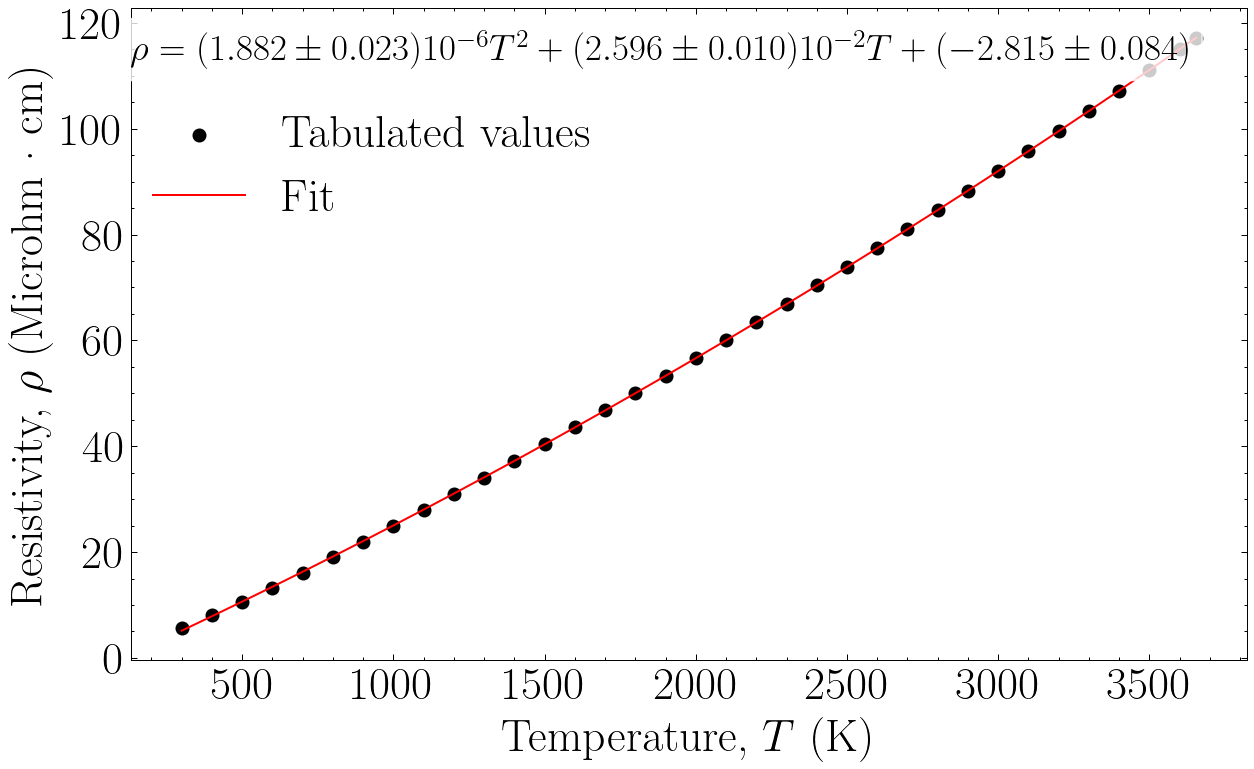

1.8815573799006404e-06


In [32]:
# Plot temperature versus resistivity
temperature = np.array([300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300,\
          1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400, 2500, 2600,\
              2700, 2800, 2900, 3000, 3100, 3200, 3300, 3400, 3500, 3600, 3655])
resistivity = np.array([5.65, 8.06, 10.56, 13.23, 16.09, 19.00, 21.94, 24.93,\
          27.94, 30.98, 34.08, 37.19, 40.36, 43.55, 46.78, 50.05, 53.35, 56.67,\
              60.06, 63.48, 66.91, 70.39, 73.91, 77.49, 81.04, 84.70, 88.33, 92.04,\
                  95.76, 99.54, 103.3, 107.2, 111.1, 115.0, 117.1])

def poly2(x, m2, m1, k):
    return m2*x**2+m1*x+k

popt, cov = curve_fit(poly2, temperature, resistivity)
m2 = popt[0]
m2_err = np.sqrt(float(cov[0][0]))
m1 = popt[1]
m1_err = np.sqrt(float(cov[1][1]))
k = popt[2]
k_err = np.sqrt(float(cov[2][2]))

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.plot(temperature, m2*temperature**2+m1*temperature+k, color='red', label='Fit')
ax.scatter(temperature, resistivity, color='black', label='Tabulated values')
annotation ='$\\rho = ({0:.3f} \pm {1:.3f})10^{{-6}}T^2 + ({2:.3f} \pm {3:.3f})10^{{-2}}T+({4:.3f} \pm {5:.3f})$'.format(m2*1e6, m2_err*1e6, m1*100, m1_err*100, k, k_err)
ax.annotate(annotation, size=18.5, xy=(1885, 113), xycoords='data', ha='center', bbox=dict(boxstyle="round", fc='#ffffff', alpha=0.8, color='#ffffff'))
ax.set_xlabel('Temperature, $T$ (K)')
ax.set_ylabel('Resistivity, $\\rho$ (Microhm · cm)')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1],labels[::-1], loc='upper right', bbox_to_anchor=(0.45, 0.9), numpoints=1)
plt.show()

T_room = 296.2
T_unc = 0.1
resistivity_room = m2*T_room**2 + m1*T_room + k
resistivity_room_unc = m2_err*T_room**2 + 2*m2*T_room*T_unc + m1_err*T_room + m1*T_unc + k_err
print(m2)

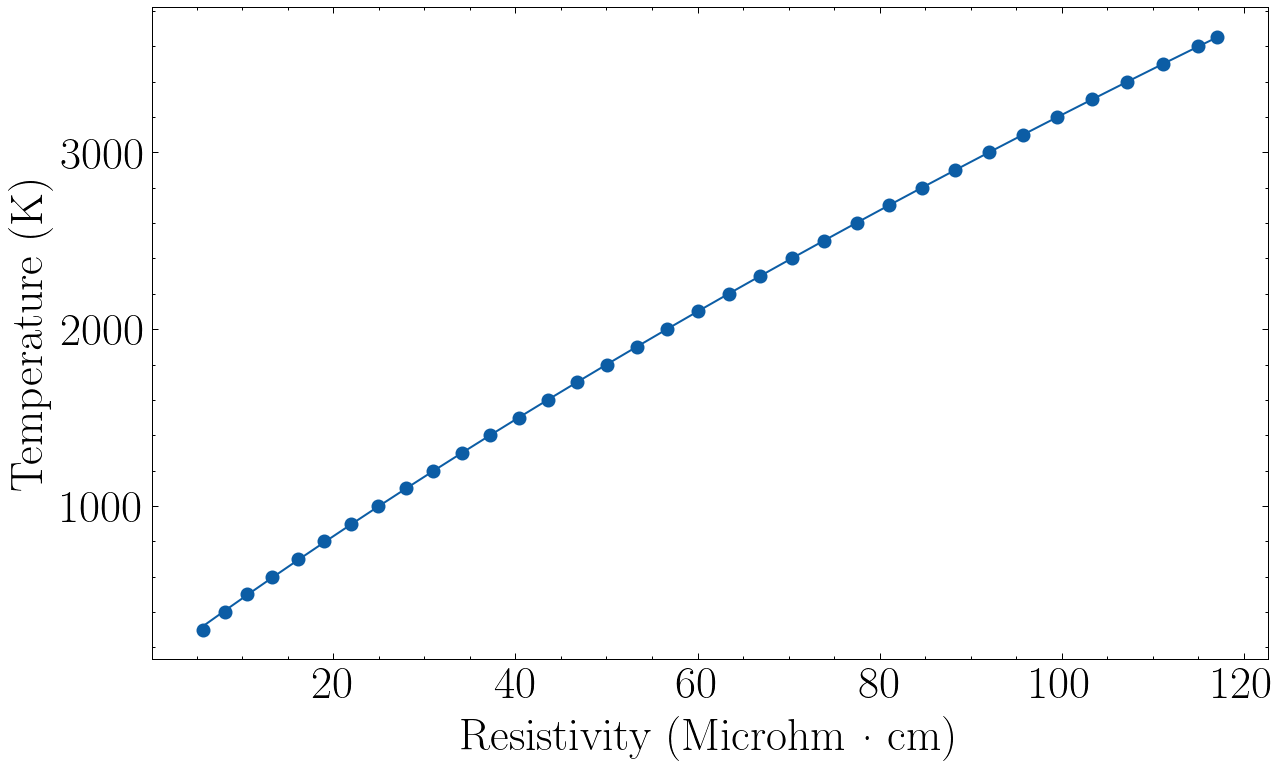

In [14]:
def completing_square_poly2(y, m2, m1, k):
    return (y/m2 - k/m2 + (m1/(2*m2))**2)**(0.5)-m1/(2*m2)

fig2 = plt.figure(figsize=(10,6))
ax2 = fig2.add_subplot(1,1,1)
ax2.scatter(resistivity, temperature)
ax2.plot(resistivity, completing_square_poly2(resistivity, m2, m1, k))
ax2.set_xlabel('Resistivity (Microhm · cm)')
ax2.set_ylabel('Temperature (K)')
plt.show()

In [15]:
# Calculation of alfa
voltage_source_meas_1 = np.array([0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.10])
current_meas1_1 = np.array([0.005, 0.008, 0.012, 0.016, 0.017, 0.020, 0.025, 0.028])
voltage_meas1_1 = np.array([0.0150, 0.0232, 0.0336, 0.0451, 0.0490, 0.0551, 0.0722, 0.0784])
current_meas2_1 = np.flip(np.array([0.028, 0.025, 0.022, 0.018, 0.016, 0.012, 0.010, 0.005]))
voltage_meas2_1 = np.flip(np.array([0.0806, 0.0709, 0.0635, 0.0519, 0.0445, 0.0346, 0.0270, 0.0158]))
current_meas_1 = (current_meas1_1 + current_meas2_1)/2
voltage_meas_1 = (voltage_meas1_1 + voltage_meas2_1)/2

popt, cov = curve_fit(poly2, current_meas_1, voltage_meas_1)
A = popt[0]
A_unc = np.sqrt(float(cov[0][0]))
B = popt[1]
B_unc = np.sqrt(float(cov[1][1]))
C = popt[2]
C_unc = np.sqrt(float(cov[2][2]))

I_0 = (-B+np.sqrt(B**2-4*A*C))/(2*A)
def error_root(A, B, C, A_unc, B_unc, C_unc):
    t1 = -4*A**4*C_unc**2*(-4*A*C+B**2)
    t2 = A**2*B_unc**2*(B-np.sqrt(-4*A*C+B**2))**2*(4*A*C-B**2)
    t3 = A_unc**2*(2*A*C+(-B+np.sqrt(-4*A*C+B**2))*np.sqrt(-4*A*C+B**2))**2*(4*A*C-B**2)
    t4 = A**4*(4*A*C-B**2)**2
    return np.sqrt(-(t1+t2+t3)/t4)/2
I_0_unc = error_root(A, B, C, A_unc, B_unc, C_unc)

resistance_room = (2*A*I_0+B)*1e6
resistance_room_unc = np.sqrt((2*A_unc*I_0)**2+(2*A*I_0_unc)**2+B_unc**2)*1e6
alfa = resistivity_room/resistance_room # [alfa] = cm
alfa_unc = alfa*np.sqrt((resistivity_room_unc/resistivity_room)**2+(resistance_room_unc/resistance_room)**2)

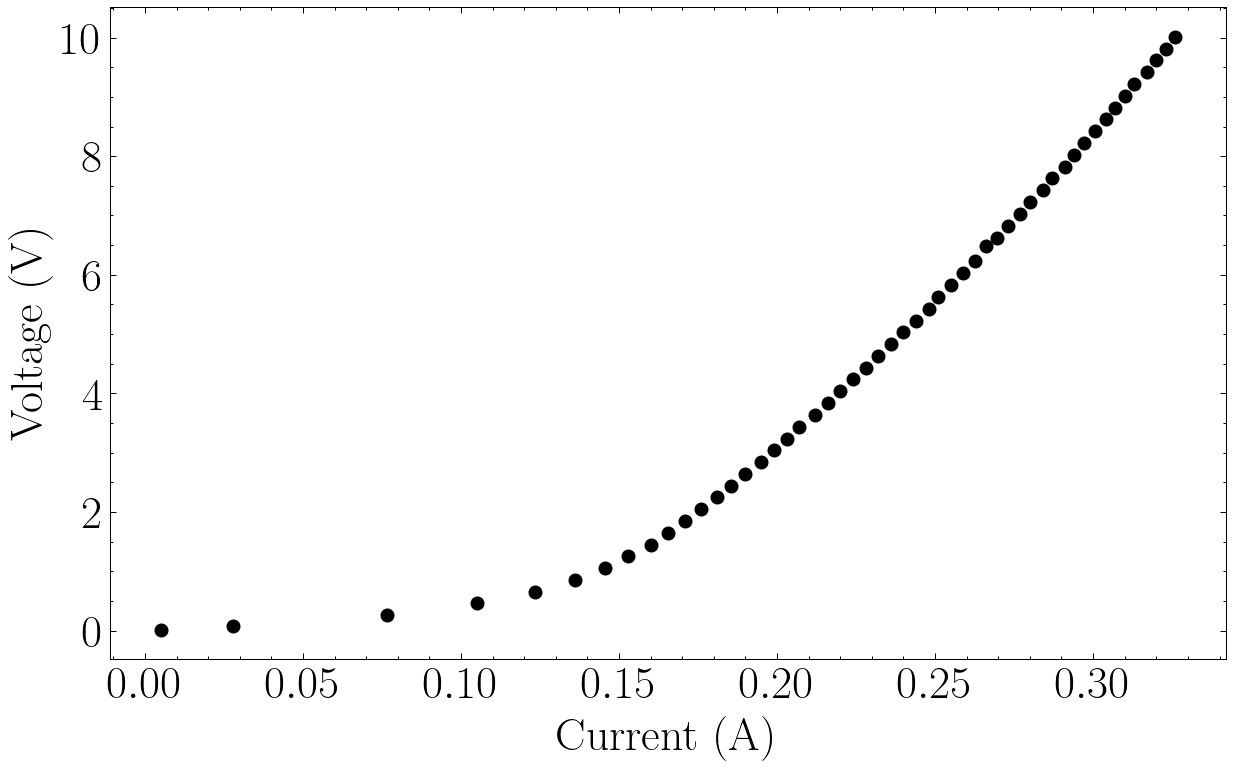

In [16]:
# Main data
current_meas1 = np.array([0.005, 0.028, 0.077, 0.105, 0.124, 0.136, 0.146, 0.153, 0.160, 0.166, 0.171, 0.176, 0.181, 0.186,\
    0.190, 0.195, 0.199, 0.203, 0.207, 0.212, 0.216, 0.220, 0.224, 0.228, 0.232, 0.236, 0.240, 0.244, 0.248, 0.251, 0.255,\
        0.259, 0.263, 0.266, 0.269, 0.273, 0.277, 0.280, 0.284, 0.287, 0.291, 0.294, 0.297, 0.301, 0.304, 0.307, 0.310, 0.313,\
            0.317, 0.320, 0.323, 0.326])
voltage_meas1 = np.array([0.0150, 0.0784, 0.2670, 0.4568, 0.6570, 0.8518, 1.0527, 1.2481, 1.4450, 1.6467, 1.8449, 2.0497, 2.2422,\
    2.4415, 2.6438, 2.8406, 3.0400, 3.2389, 3.4378, 3.6335, 3.8372, 4.0366, 4.2382, 4.4384, 4.6379,\
        4.8332, 5.0372, 5.228, 5.433, 5.631, 5.829, 6.028, 6.225, 6.427, 6.621, 6.821, 7.028, 7.224, 7.423, 7.625, 7.826, 8.024, 8.221,\
            8.426, 8.625, 8.821, 9.021, 9.221, 9.418, 9.613, 9.810, 10.016])
voltage_source_meas = np.array([0.03, 0.10, 0.30, 0.50, 0.70, 0.90, 1.10, 1.30, 1.5, 1.7, 1.9, 2.1, 2.3, 2.5, 2.7, 2.9, 3.1, 3.3, 3.5, 3.7, 3.9, 4.1, 4.3, 4.5, 4.7, 4.9, 5.1, 5.3, 5.5, 5.7, 5.9,\
        6.10, 6.3, 6.5, 6.7, 6.9, 7.1, 7.3, 7.5, 7.7, 7.9, 8.1, 8.3, 8.5, 8.7, 8.9, 9.1, 9.3, 9.5, 9.7, 9.9, 10.1])

current_meas2 = np.flip(np.array([0.326, 0.323, 0.320, 0.317, 0.313, 0.310, 0.307, 0.304, 0.300, 0.297, 0.294, 0.291, 0.287, 0.284, 0.280, 0.277, 0.273, 0.270, 0.266,\
    0.262, 0.259, 0.255, 0.251, 0.248, 0.244, 0.240, 0.236, 0.232, 0.228, 0.224, 0.220, 0.216, 0.212, 0.207, 0.203, 0.199, 0.195, 0.190,\
        0.185, 0.181, 0.176, 0.171, 0.165, 0.160, 0.153, 0.145, 0.136, 0.123, 0.105, 0.076, 0.028, 0.005]))
voltage_meas2 = np.flip(np.array([10.016, 9.816, 9.620, 9.416, 9.216, 9.019, 8.816, 8.620, 8.423, 8.221, 8.020, 7.823, 7.623, 7.425, 7.222, 7.027, 6.825, 6.628, 6.528,\
    6.225, 6.028, 5.831, 5.628, 5.428, 5.228, 5.0335, 4.8353, 4.6368, 4.4345, 4.2361, 4.0323, 3.8350, 3.6412, 3.4391, 3.2375, 3.0421, 2.8433,\
        2.6417, 2.4428, 2.2464, 2.0502, 1.8491, 1.6458, 1.4486, 1.2519, 1.0512, 0.8558, 0.6588, 0.4643, 0.2654, 0.0806, 0.0158]))

current_meas = (current_meas1 + current_meas2)/2
voltage_meas = (voltage_meas1 + voltage_meas2)/2
current_unc = np.array([0.001/np.sqrt(2)]*len(current_meas))
voltage_unc = np.array([0.0001/np.sqrt(2)]*len(voltage_meas[:-25])+[0.001/np.sqrt(2)]*25)

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.scatter(current_meas, voltage_meas, c='black')
ax.set_xlabel('Current (A)')
ax.set_ylabel('Voltage (V)')
plt.show()

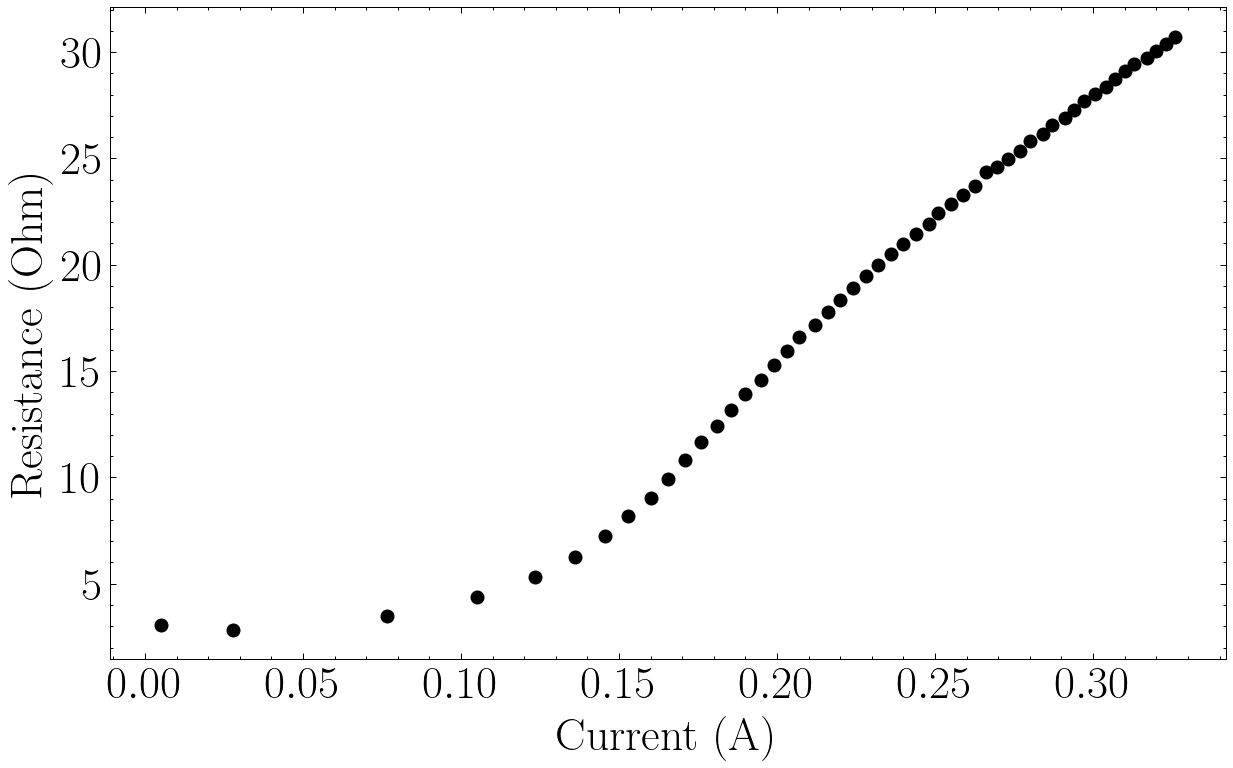

In [17]:
# Resistance calculation
resistance_meas = voltage_meas/current_meas # [resistance_meas] = ohm
resistance_unc = resistance_meas*np.sqrt((current_unc/current_meas)**2+(voltage_unc/voltage_meas)**2)
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.scatter(current_meas, resistance_meas, c='black')
ax.set_xlabel('Current (A)')
ax.set_ylabel('Resistance (Ohm)')
plt.show()

In [18]:
# Power and resistivity calculation
power = voltage_meas*current_meas
power_unc = power*np.sqrt((current_unc/current_meas)**2+(voltage_unc/voltage_meas)**2)
resistivity_meas = resistance_meas*1e6*alfa # [resistivity_meas] = microhm · cm
resistivity_meas_unc = resistance_meas*1e6*alfa_unc + resistance_unc*1e6*alfa

In [19]:
# Temperature calculation
temperature_meas = completing_square_poly2(resistivity_meas, m2, m1, k)
res = np.array([u.ufloat((a, b)) for a, b in zip(resistivity_meas, resistivity_meas_unc)])
m1_ = u.ufloat(m1, m1_err)
m2_ = u.ufloat(m2, m2_err)
k_ = u.ufloat(k, k_err)
temperature_meas_unc = [float(''.join(str(value).split('/-')[1].split(')'))) for value in \
          (res/m2_ - k_/m2_ + (m1_/(2*m2_))**2)**(0.5)-m1_/(2*m2_)]

C:\Users\amaia\AppData\Local\Temp\ipykernel_38112\975437557.py:3: UserWarning: Obsolete: either use ufloat(nominal_value, std_dev), ufloat(nominal_value, std_dev, tag), or the ufloat_fromstr() function, for string representations. Code can be automatically updated with python -m uncertainties.1to2 -w ProgramDirectory.
  res = np.array([u.ufloat((a, b)) for a, b in zip(resistivity_meas, resistivity_meas_unc)])


1.3869484706510764e-13


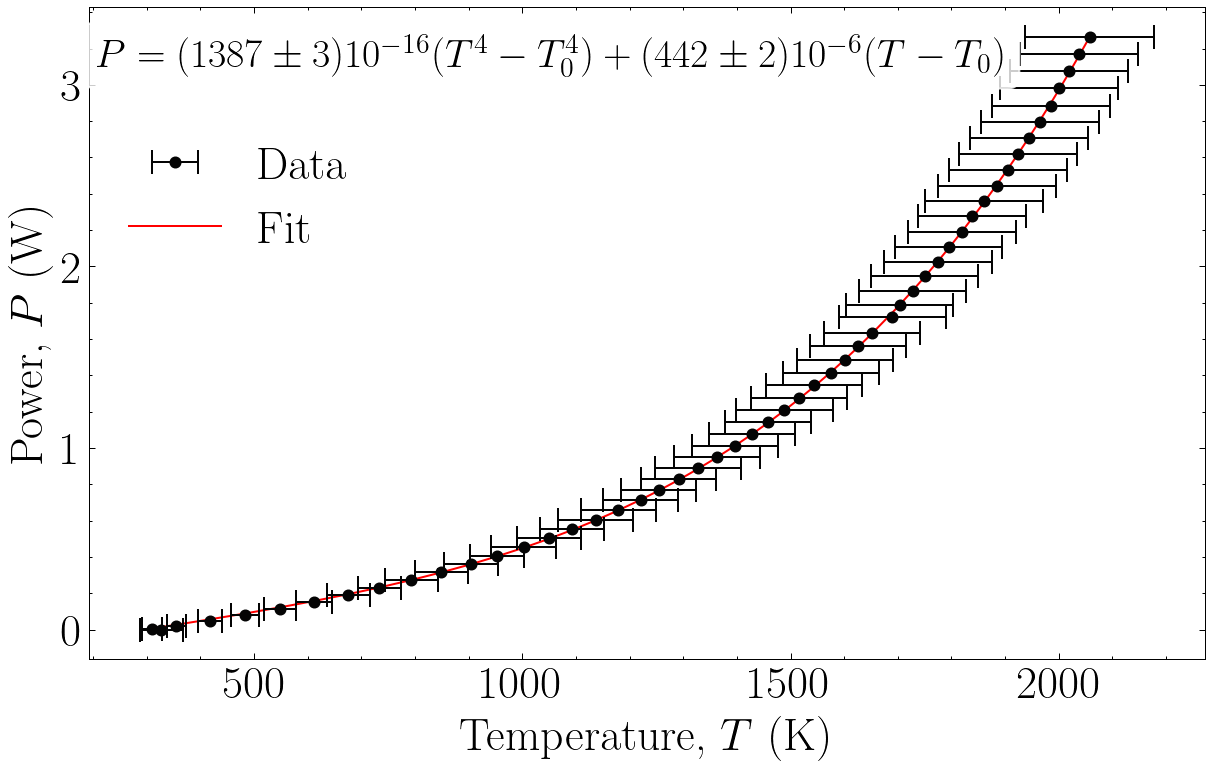

In [35]:
def poly4(T, A, B):
    return A*(T**4-T_room**4) + B*(T-T_room)

# error propagation, if not not take into account error in x
# mean square error not possible when formula fixed from start (as in compl sqr) because each term is diff estimated slope etc
power = power
power_unc = power_unc
popt, cov = curve_fit(poly4, temperature_meas, power, method='lm')
A = popt[0]
print(A)
A_err = np.sqrt(float(cov[0][0]))
B = popt[1]
B_err = np.sqrt(float(cov[1][1]))

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.plot(temperature_meas, poly4(temperature_meas, A, B), label='Fit', c='red')
ax.errorbar(temperature_meas, power, marker='o', markersize = 5, xerr=temperature_meas_unc, linestyle='none', label='Data', capsize=6, c='#040404')
ax.set_xlabel('Temperature, $T$ (K)')
ax.set_ylabel('Power, $P$ (W)')
annotation ='$P = ({0:.0f} \pm {1:.0f})10^{{-16}}(T^4-T_0^4) + ({2:.0f} \pm {3:.0f})10^{{-6}}(T-T_0)$'.format(A*1e16, A_err*1e16, B*1e6, B_err*1e6)
ax.annotate(annotation, size=20, xy=(1055, 3.1), xycoords='data', ha='center', bbox=dict(boxstyle="round", fc='#ffffff', alpha=0.8, color='#ffffff'))
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1],labels[::-1], loc='upper right', bbox_to_anchor=(0.27, 0.85), numpoints=1)
plt.show()

1458.6608825878038
3.067544592902498


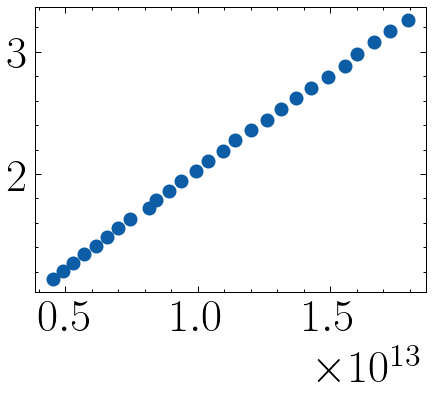

In [21]:
# High temperature regime
plt.scatter((temperature_meas**4)[-round(0.51*len(temperature_meas)):], power[-round(0.51*len(temperature_meas)):])
def line(T, m, k):
    return m*T+k

popt, cov = curve_fit(line, (temperature_meas**4)[-round(0.51*len(temperature_meas)):], power[-round(0.51*len(temperature_meas)):])
m = popt[0]
m_unc = np.sqrt(float(cov[0][0]))
k = popt[1]
k_unc = np.sqrt(float(cov[1][1]))
print((temperature_meas)[-round(0.51*len(temperature_meas))])
popt, cov = curve_fit(line, np.log((temperature_meas)[-round(0.51*len(temperature_meas)):]), np.log(power[-round(0.51*len(temperature_meas)):]))
m = popt[0]
m_unc = np.sqrt(float(cov[0][0]))
k = popt[1]
k_unc = np.sqrt(float(cov[1][1]))

# conversion into dataframe
#df = pd.DataFrame(data={'T': (temperature_meas)[-round(0.51*len(temperature_meas)):], 'P': power[-round(0.51*len(temperature_meas)):]})
#df.to_csv('./data.csv')
print(m)

733.5427093907001
1.3076016645176531


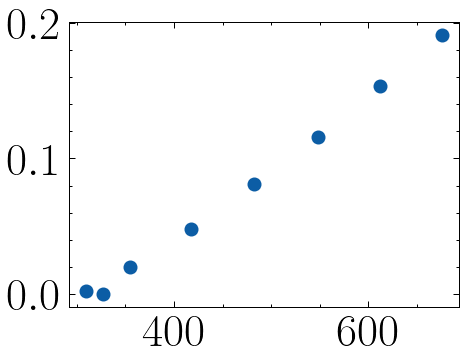

In [22]:
# Low temperature regime
plt.scatter(temperature_meas[:round(0.15*len(temperature_meas))], power[:round(0.15*len(temperature_meas))])
def line(x, m, k):
    return m*x + k
print(temperature_meas[round(0.15*len(temperature_meas))])
popt, cov = curve_fit(line, np.log(temperature_meas[:round(0.05*len(temperature_meas))]-T_room), np.log(power[:round(0.05*len(temperature_meas))]))
m = popt[0]
m_unc = np.sqrt(float(cov[0][0]))
k = popt[1]
k_unc = np.sqrt(float(cov[1][1]))
print(m)